In [ ]:
!pip3 install --quiet numpy==1.23.3 pandas==1.4.2 scipy==1.8.0 pymde
!pip3 install --quiet scanpy scanorama

In [ ]:
import pandas as pd
import numpy as np
import torch
from sklearn.neighbors import KNeighborsClassifier
import scipy
import scanpy as sc
import scanpy.external as sce
import scanorama

In [ ]:
import pymde

In [ ]:
from google.colab import drive    
drive.mount('/content/drive/')

adata = torch.load('/content/drive/My Drive/scData/scnym_source_anndata_temp.trchpkl')

Mounted at /content/drive/


In [ ]:
adata

{1: AnnData object with n_obs × n_vars = 20000 × 31533
     obs: 'tissue', 'depot', 'cell_type', 'cell_type2', 'dataset', 'cell_annot_orig', 'ref_annotations'
     var: 'features', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
     uns: 'hvg', 'pca', 'log1p'
     obsm: 'X_pca'
     varm: 'PCs'
     layers: 'counts', 2: AnnData object with n_obs × n_vars = 23428 × 22979
     obs: 'nGene', 'nUMI', 'orig.ident', 'timepoint', 'time_combined', 'percent.mito', 'branch', 'depot', 'nCount_RNA', 'nFeature_RNA', 'dataset', 'cell_annot_orig', 'ref_annotations'
     var: 'features', 3: AnnData object with n_obs × n_vars = 20000 × 18306
     obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'diabetes', 'depot', 'celltype', 'predicted.id', 'dataset', 'cell_annot_orig', 'ref_annotations'
     var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
     uns: 'hvg', 'pca', 'log1p'
     obsm: 'X_pca'
     varm: 'PCs'
     layers: 'counts', 4: AnnData object with 

In [ ]:
rosen = adata[1]
scheele = adata[2]
vijay = adata[3]
wolfrum = adata[4]
del adata

In [ ]:
vijay.obs['cell_annot_orig'].unique()

array(['vijay_E1', 'vijay_P2', 'vijay_I2', 'vijay_I6', 'vijay_P7',
       'vijay_E2', 'vijay_I1', 'vijay_I3', 'vijay_I4', 'vijay_I5',
       'vijay_P4', 'vijay_P6', 'vijay_I7', 'vijay_E3', 'vijay_P5',
       'vijay_P3', 'vijay_P1'], dtype=object)

In [ ]:
scheele.var_names

Index(['RP11-34P13.7', 'AL627309.1', 'AP006222.2', 'RP4-669L17.10',
       'RP5-857K21.4', 'RP11-206L10.3', 'RP11-206L10.2', 'RP11-206L10.9',
       'FAM87B', 'LINC00115',
       ...
       'AC145212.1', 'MGC39584', 'AL592170.1', 'AC011043.1', 'ZNF84.1',
       'AL592183.1', 'AC011841.1', 'AL354822.1', 'PNRC2.1', 'SRSF10.1'],
      dtype='object', length=22979)

In [ ]:
rosen.X = rosen.raw.X.copy()
rosen.X[10:20,10:20].todense()

matrix([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 3.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 2.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 2.],
        [0., 0., 0., 0., 2., 0., 0., 0., 0., 3.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
wolfrum.X = wolfrum.raw.X.copy()
wolfrum.X[10:20,10:20].todense()

matrix([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
scheele.X = scheele.raw.X.copy()
scheele.X[10:20,10:20].todense()

matrix([[0., 0., 0., 0., 0., 0., 4., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 3., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 2., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [2., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 3., 0., 0., 0.],
        [1., 0., 0., 0., 0., 2., 1., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 4., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 1., 0., 0., 0.]])

In [ ]:
rosen_scheele = rosen.concatenate(scheele)
sc.pp.filter_cells(rosen_scheele, min_counts=10, inplace=True)
sc.pp.normalize_total(rosen_scheele, target_sum=1e4)
sc.pp.log1p(rosen_scheele)
sc.pp.highly_variable_genes(rosen_scheele, batch_key = 'dataset', subset=True)
sc.pp.scale(rosen_scheele, max_value=10, zero_center=False)
sc.tl.pca(rosen_scheele)


/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/usr/local/lib/python3.8/dist-packages/scanpy/preprocessing/_highly_variable_genes.py:478: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)
/usr/local/lib/python3.8/dist-packages/scanpy/preprocessing/_highly_variable_genes.py:478: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)


In [ ]:
rosen_scheele

AnnData object with n_obs × n_vars = 43428 × 2312
    obs: 'tissue', 'depot', 'cell_type', 'cell_type2', 'dataset', 'cell_annot_orig', 'ref_annotations', 'nGene', 'nUMI', 'orig.ident', 'timepoint', 'time_combined', 'percent.mito', 'branch', 'nCount_RNA', 'nFeature_RNA', 'batch', 'n_counts'
    var: 'features', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'mean-0', 'std-0', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [ ]:
sce.pp.scanorama_integrate(rosen_scheele, key = 'dataset', basis = 'X_pca')

[[0.         0.09501451]
 [0.         0.        ]]


In [ ]:
print(rosen_scheele.obsm['X_scanorama'].shape)

(43428, 50)


In [ ]:
sc.pp.neighbors(rosen_scheele, n_pcs =50, use_rep = 'X_scanorama')

In [ ]:
rosen_scheele

AnnData object with n_obs × n_vars = 43428 × 2312
    obs: 'tissue', 'depot', 'cell_type', 'cell_type2', 'dataset', 'cell_annot_orig', 'ref_annotations', 'nGene', 'nUMI', 'orig.ident', 'timepoint', 'time_combined', 'percent.mito', 'branch', 'nCount_RNA', 'nFeature_RNA', 'batch', 'n_counts'
    var: 'features', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'mean-0', 'std-0', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors'
    obsm: 'X_pca', 'X_scanorama'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [ ]:
py_emb = pymde.preserve_neighbors(rosen_scheele.obsm["X_scanorama"], constraint=pymde.Standardized(), n_neighbors = 30, verbose = True).embed(verbose = True)
rosen_scheele.obsm["X_mde"] = py_emb.cpu().numpy()

Jan 14 10:32:11 PM: Computing 30-nearest neighbors, with max_distance=None
Sat Jan 14 22:32:11 2023 Building RP forest with 19 trees
Sat Jan 14 22:32:11 2023 NN descent for 15 iterations
	 1  /  15
	 2  /  15
	Stopping threshold met -- exiting after 2 iterations
Jan 14 10:32:17 PM: Computing quadratic initialization.
Jan 14 10:32:25 PM: Fitting a standardized embedding into R^2, for a graph with 43428 items and 1436578 edges.
Jan 14 10:32:25 PM: `embed` method parameters: eps=1.0e-05, max_iter=300, memory_size=10
Jan 14 10:32:26 PM: iteration 000 | distortion 0.558105 | residual norm 0.43876 | step length 0.0193073 | percent change 0.00287441
Jan 14 10:32:31 PM: iteration 030 | distortion 0.132372 | residual norm 0.000491991 | step length 1 | percent change 1.10897
Jan 14 10:32:37 PM: iteration 060 | distortion 0.126267 | residual norm 0.000160511 | step length 1 | percent change 0.495525
Jan 14 10:32:42 PM: iteration 090 | distortion 0.125153 | residual norm 0.000100019 | step length 

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


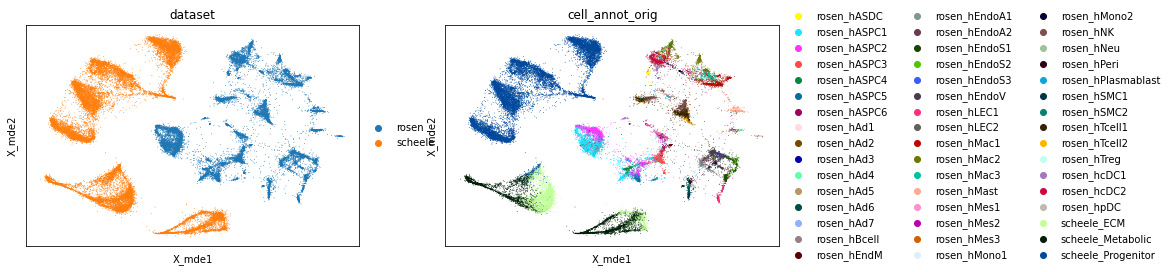

In [ ]:
sc.pl.embedding(rosen_scheele, basis = 'X_mde', color=['dataset','cell_annot_orig'])

In [ ]:
ref_idx = rosen_scheele.obs["dataset"] == "rosen"
query_idx = rosen_scheele.obs["dataset"] == "scheele"

train_X = rosen_scheele[ref_idx].obsm["X_scanorama"]
train_Y = rosen_scheele[ref_idx].obs["cell_annot_orig"].to_numpy()
test_X = rosen_scheele[query_idx].obsm["X_scanorama"]
knn = KNeighborsClassifier(weights = 'uniform', n_neighbors = 15, n_jobs = -1, )
knn.fit(train_X, train_Y)
knn_pred = knn.predict(test_X)
knn_predProb = knn.predict_proba(test_X)
# save_results
rosen_scheele.obs["predicted_annot"] = rosen_scheele.obs["cell_annot_orig"]
rosen_scheele.obs.loc[query_idx, "predicted_annot"] = knn_pred

In [ ]:
scheele_rosen_ref = rosen_scheele[rosen_scheele.obs['dataset']=='scheele', :]
scheele_rosen_ref.obs[['branch','predicted_annot']].to_csv('/content/drive/My Drive/scData/rosen_scano_integ.csv')
np.savetxt('/content/drive/My Drive/scData/rosen_knn_predprob.csv',knn_predProb,delimiter = ",", fmt ='%1.7f')

In [ ]:
print(rosen_scheele[rosen_scheele.obs['dataset'] == 'rosen'].obs["cell_annot_orig"].cat.categories)

Index(['rosen_hASDC', 'rosen_hASPC1', 'rosen_hASPC2', 'rosen_hASPC3',
       'rosen_hASPC4', 'rosen_hASPC5', 'rosen_hASPC6', 'rosen_hAd1',
       'rosen_hAd2', 'rosen_hAd3', 'rosen_hAd4', 'rosen_hAd5', 'rosen_hAd6',
       'rosen_hAd7', 'rosen_hBcell', 'rosen_hEndM', 'rosen_hEndoA1',
       'rosen_hEndoA2', 'rosen_hEndoS1', 'rosen_hEndoS2', 'rosen_hEndoS3',
       'rosen_hEndoV', 'rosen_hLEC1', 'rosen_hLEC2', 'rosen_hMac1',
       'rosen_hMac2', 'rosen_hMac3', 'rosen_hMast', 'rosen_hMes1',
       'rosen_hMes2', 'rosen_hMes3', 'rosen_hMono1', 'rosen_hMono2',
       'rosen_hNK', 'rosen_hNeu', 'rosen_hPeri', 'rosen_hPlasmablast',
       'rosen_hSMC1', 'rosen_hSMC2', 'rosen_hTcell1', 'rosen_hTcell2',
       'rosen_hTreg', 'rosen_hcDC1', 'rosen_hcDC2', 'rosen_hpDC'],
      dtype='object')


/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/usr/lib/python3.8/contextlib.py:120: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


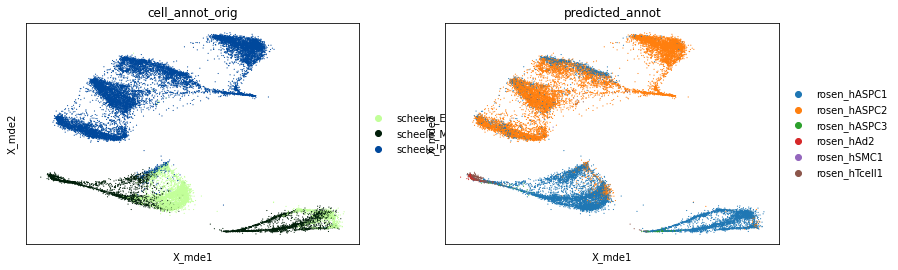

In [ ]:

sc.pl.embedding(rosen_scheele[rosen_scheele.obs['dataset'] == 'scheele'], basis = 'X_mde', color=['cell_annot_orig','predicted_annot'])

In [ ]:
rosen_scheele[rosen_scheele.obs['dataset'] == 'scheele'].obs['predicted_annot'].value_counts()

rosen_hASPC2     12663
rosen_hASPC1      9886
rosen_hTcell1      571
rosen_hASPC3       182
rosen_hAd2         119
rosen_hSMC1          7
Name: predicted_annot, dtype: int64

Wolfrum data integration and label transfer

In [ ]:
wolfrum_scheele = wolfrum.concatenate(scheele)
sc.pp.filter_cells(wolfrum_scheele, min_counts=10, inplace=True)
sc.pp.normalize_total(wolfrum_scheele, target_sum=1e4)
sc.pp.log1p(wolfrum_scheele)
sc.pp.highly_variable_genes(wolfrum_scheele, batch_key = 'dataset', subset=True)
sc.pp.scale(wolfrum_scheele, max_value=10, zero_center=False)
sc.tl.pca(wolfrum_scheele)
sce.pp.scanorama_integrate(wolfrum_scheele, key = 'dataset', basis = 'X_pca')
sc.pp.neighbors(wolfrum_scheele, n_pcs =50, use_rep = 'X_scanorama')

ref_idx = wolfrum_scheele.obs["dataset"] == "wolfrum"
query_idx = wolfrum_scheele.obs["dataset"] == "scheele"

#knn classifier
train_X = wolfrum_scheele[ref_idx].obsm["X_scanorama"]
train_Y = wolfrum_scheele[ref_idx].obs["cell_annot_orig"].to_numpy()
test_X = wolfrum_scheele[query_idx].obsm["X_scanorama"]
knn = KNeighborsClassifier(weights = 'uniform', n_neighbors = 15, n_jobs = -1, )
knn.fit(train_X, train_Y)
knn_pred = knn.predict(test_X)
knn_predProb = knn.predict_proba(test_X)
# save_results
wolfrum_scheele.obs["predicted_annot"] = wolfrum_scheele.obs["cell_annot_orig"]
wolfrum_scheele.obs.loc[query_idx, "predicted_annot"] = knn_pred

/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/usr/local/lib/python3.8/dist-packages/scanpy/preprocessing/_highly_variable_genes.py:478: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)
/usr/local/lib/python3.8/dist-packages/scanpy/preprocessing/_highly_variable_genes.py:478: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)


[[0.         0.03909851]
 [0.         0.        ]]


/usr/local/lib/python3.8/dist-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/usr/lib/python3.8/contextlib.py:120: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


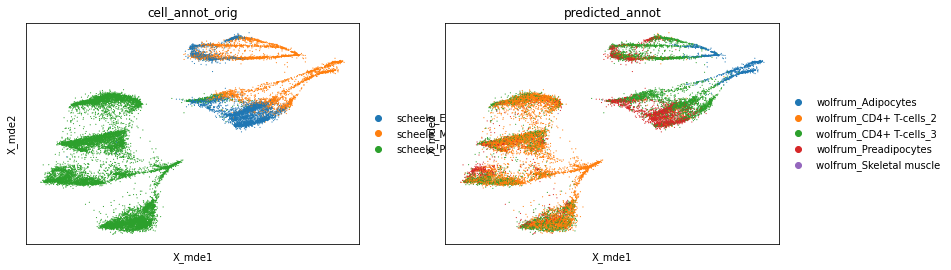

In [ ]:
py_emb = pymde.preserve_neighbors(wolfrum_scheele.obsm["X_scanorama"], constraint=pymde.Standardized(), n_neighbors = 30, verbose = True).embed(verbose = True)
wolfrum_scheele.obsm["X_mde"] = py_emb.cpu().numpy()
sc.pl.embedding(wolfrum_scheele[wolfrum_scheele.obs['dataset'] == 'scheele'], basis = 'X_mde', color=['cell_annot_orig','predicted_annot'])

In [ ]:
wolfrum_scheele[wolfrum_scheele.obs['dataset'] == 'scheele'].obs['predicted_annot'].value_counts()

wolfrum_CD4+ T-cells_2     9786
wolfrum_CD4+ T-cells_3     8051
wolfrum_Preadipocytes      4269
wolfrum_Adipocytes         1319
wolfrum_Skeletal muscle       3
Name: predicted_annot, dtype: int64

In [ ]:
scheele_wolfrum_ref = wolfrum_scheele[wolfrum_scheele.obs['dataset']=='scheele', :]
scheele_wolfrum_ref.obs[['branch','predicted_annot']].to_csv('/content/drive/My Drive/scData/wolfrum_scano_integ.csv')
np.savetxt('/content/drive/My Drive/scData/wolfrum_knn_predprob.csv',knn_predProb,delimiter = ",", fmt ='%1.7f')

print(wolfrum_scheele[wolfrum_scheele.obs['dataset'] == 'wolfrum'].obs["cell_annot_orig"].cat.categories)

Index(['wolfrum_Adipocytes', 'wolfrum_CD4+ T-cells_1',
       'wolfrum_CD4+ T-cells_2', 'wolfrum_CD4+ T-cells_3',
       'wolfrum_Class-switched memory B-cells', 'wolfrum_Dendritic cells',
       'wolfrum_Endothelial cells_1', 'wolfrum_Endothelial cells_2',
       'wolfrum_Fibroblasts', 'wolfrum_Macrophages', 'wolfrum_Preadipocytes',
       'wolfrum_Skeletal muscle'],
      dtype='object')


In [ ]:
vijay.X = vijay.raw.X.copy()
vijay.X[10:20,10:20].todense()

matrix([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         2.15162082, 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.    

Vijay dataset is already normalized. 

In [ ]:
sc.pp.normalize_total(scheele, target_sum=1e4)

vijay_scheele = vijay.concatenate(scheele)
sc.pp.filter_cells(vijay_scheele, min_counts=10, inplace=True)
#sc.pp.normalize_total(vijay_scheele, target_sum=1e4)
sc.pp.log1p(vijay_scheele)
sc.pp.highly_variable_genes(vijay_scheele, batch_key = 'dataset', subset=True)
sc.pp.scale(vijay_scheele, max_value=10, zero_center=False)
sc.tl.pca(vijay_scheele)
sce.pp.scanorama_integrate(vijay_scheele, key = 'dataset', basis = 'X_pca')
sc.pp.neighbors(vijay_scheele, n_pcs =50, use_rep = 'X_scanorama')

ref_idx = vijay_scheele.obs["dataset"] == "vijay"
query_idx = vijay_scheele.obs["dataset"] == "scheele"

train_X = vijay_scheele[ref_idx].obsm["X_scanorama"]
train_Y = vijay_scheele[ref_idx].obs["cell_annot_orig"].to_numpy()
test_X = vijay_scheele[query_idx].obsm["X_scanorama"]
knn = KNeighborsClassifier(weights = 'uniform', n_neighbors = 15, n_jobs = -1, )
knn.fit(train_X, train_Y)
knn_pred = knn.predict(test_X)
knn_predProb = knn.predict_proba(test_X)
# save_results
vijay_scheele.obs["predicted_annot"] = vijay_scheele.obs["cell_annot_orig"]
vijay_scheele.obs.loc[query_idx, "predicted_annot"] = knn_pred

/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/usr/local/lib/python3.8/dist-packages/scanpy/preprocessing/_highly_variable_genes.py:478: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)
/usr/local/lib/python3.8/dist-packages/scanpy/preprocessing/_highly_variable_genes.py:478: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)


[[0.         0.10679529]
 [0.         0.        ]]
Processing datasets vijay <=> scheele


Jan 14 11:25:02 PM: Computing 30-nearest neighbors, with max_distance=None
Sat Jan 14 23:25:02 2023 Building RP forest with 19 trees
Sat Jan 14 23:25:03 2023 NN descent for 15 iterations
	 1  /  15
	 2  /  15
	 3  /  15
	Stopping threshold met -- exiting after 3 iterations
Jan 14 11:25:09 PM: Computing quadratic initialization.
Jan 14 11:25:24 PM: Fitting a standardized embedding into R^2, for a graph with 43428 items and 1577972 edges.
Jan 14 11:25:24 PM: `embed` method parameters: eps=1.0e-05, max_iter=300, memory_size=10
Jan 14 11:25:25 PM: iteration 000 | distortion 0.457078 | residual norm 0.261719 | step length 0.0437563 | percent change 0.00388576
Jan 14 11:25:30 PM: iteration 030 | distortion 0.138644 | residual norm 0.000903154 | step length 1 | percent change 0.3363
Jan 14 11:25:36 PM: iteration 060 | distortion 0.133712 | residual norm 0.000207986 | step length 1 | percent change 0.369598
Jan 14 11:25:42 PM: iteration 090 | distortion 0.133183 | residual norm 0.000103159 | s

/usr/local/lib/python3.8/dist-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/usr/lib/python3.8/contextlib.py:120: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


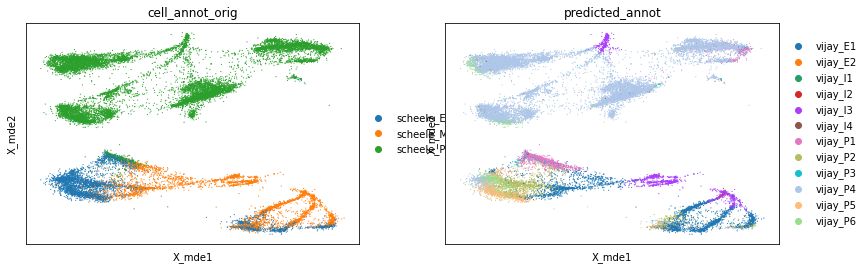

In [ ]:
py_emb = pymde.preserve_neighbors(vijay_scheele.obsm["X_scanorama"], constraint=pymde.Standardized(), n_neighbors = 30, verbose = True).embed(verbose = True)
vijay_scheele.obsm["X_mde"] = py_emb.cpu().numpy()
sc.pl.embedding(vijay_scheele[vijay_scheele.obs['dataset'] == 'scheele'], basis = 'X_mde', color=['cell_annot_orig','predicted_annot'])

In [ ]:
vijay_scheele[vijay_scheele.obs['dataset'] == 'scheele'].obs['predicted_annot'].value_counts()

vijay_P4    12897
vijay_E1     3441
vijay_I3     1717
vijay_P2     1544
vijay_P5     1297
vijay_P1     1280
vijay_P6      996
vijay_P3      188
vijay_I4       32
vijay_I2       30
vijay_E2        5
vijay_I1        1
Name: predicted_annot, dtype: int64

In [ ]:
scheele_vijay_ref = vijay_scheele[vijay_scheele.obs['dataset']=='scheele', :]
scheele_vijay_ref.obs[['branch','predicted_annot']].to_csv('/content/drive/My Drive/scData/vijay_scano_integ.csv')
np.savetxt('/content/drive/My Drive/scData/vijay_knn_predprob.csv',knn_predProb,delimiter = ",", fmt ='%1.7f')

print(vijay_scheele[vijay_scheele.obs['dataset'] == 'vijay'].obs["cell_annot_orig"].cat.categories)

Index(['vijay_E1', 'vijay_E2', 'vijay_E3', 'vijay_I1', 'vijay_I2', 'vijay_I3',
       'vijay_I4', 'vijay_I5', 'vijay_I6', 'vijay_I7', 'vijay_P1', 'vijay_P2',
       'vijay_P3', 'vijay_P4', 'vijay_P5', 'vijay_P6', 'vijay_P7'],
      dtype='object')
